# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Input Nama]
- **Email:** [Input Email]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap permintaan sewa sepeda?
- Apakah terdapat perbedaan proporsi pengguna casual dan registered berdasarkan musim?

## Import Semua Packages/Library yang Digunakan

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [93]:
day_df = pd.read_csv("Data_set/day.csv", delimiter=",")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [94]:
hour_df = pd.read_csv("Data_set/hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [95]:
specific_value_df = hour_df.loc[hour_df['weathersit'] == '1']
print(specific_value_df)

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [96]:
specific_value_df = day_df.loc[day_df['weathersit'] == '4']
print(specific_value_df)

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [97]:
specific_value_df = hour_df.loc[hour_df['dteday'] == '2011-01-01']
value_sum=specific_value_df['cnt'].sum()

# Menampilkan DataFrame hasil seleksi
print(value_sum)

985


### Assessing Data

In [98]:
day_df.info()
print("Jumlah duplikasi: ", day_df.duplicated().sum())

day_df.describe()

#dteday tipe data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [99]:
hour_df.info()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

hour_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [100]:
#Merubah tipe data pada kolom dteday dari object menjadi date

datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [101]:
#Merubah tipe data pada kolom dteday dari object menjadi date
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [102]:
day_df.query('dteday == "2011-01-26"')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
25,26,2011-01-26,1,0,1,0,3,1,3,0.2175,0.2036,0.8625,0.29385,34,472,506


In [103]:
hour_df.query('weathersit == 4')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
585,586,2011-01-26,1,0,1,16,0,3,1,4,0.22,0.1970,0.93,0.3284,1,35,36
8854,8855,2012-01-09,1,1,1,18,0,1,1,4,0.20,0.2273,0.86,0.0896,6,158,164
9123,9124,2012-01-21,1,1,1,1,0,6,0,4,0.14,0.1364,0.86,0.1940,1,22,23


In [104]:
hour_df.query('dteday == "2011-01-26"')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
571,572,2011-01-26,1,0,1,0,0,3,1,2,0.22,0.2273,0.69,0.1343,3,14,17
572,573,2011-01-26,1,0,1,1,0,3,1,2,0.24,0.2424,0.65,0.1343,0,5,5
573,574,2011-01-26,1,0,1,2,0,3,1,3,0.22,0.2273,0.69,0.1940,3,7,10
574,575,2011-01-26,1,0,1,5,0,3,1,3,0.20,0.1818,0.86,0.2836,0,1,1
575,576,2011-01-26,1,0,1,6,0,3,1,3,0.20,0.1818,0.86,0.2836,0,8,8
576,577,2011-01-26,1,0,1,7,0,3,1,3,0.22,0.2121,0.87,0.2985,1,29,30
577,578,2011-01-26,1,0,1,8,0,3,1,3,0.22,0.2121,0.87,0.2985,3,69,72
578,579,2011-01-26,1,0,1,9,0,3,1,3,0.22,0.2121,0.87,0.2985,3,55,58
579,580,2011-01-26,1,0,1,10,0,3,1,3,0.22,0.2121,0.93,0.2836,2,26,28
580,581,2011-01-26,1,0,1,11,0,3,1,3,0.22,0.1970,0.93,0.3284,6,35,41


## Exploratory Data Analysis (EDA)

### Explore ...

PERTANYAAN 1: Bagaimana pengaruh kondisi cuaca  terhadap permintaan sewa sepeda?

Menambahkan kolom baru dengan nama weather yang berisi kategori cuaca








In [105]:
weathersit_list = day_df.weathersit.tolist()
weather_mapping = {
    1: "Sunny/Few Clouds",
    2: "Foggy",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow",
}

day_df["weather"] = day_df["weathersit"].apply(lambda x: weather_mapping.get(x, "Unknown"))
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weather
704,705,2012-12-05,4,1,12,0,3,1,1,0.438333,0.428012,0.485000,0.324021,331,5398,5729,Sunny/Few Clouds
379,380,2012-01-15,1,1,1,0,0,0,1,0.166667,0.161625,0.419167,0.251258,284,2027,2311,Sunny/Few Clouds
584,585,2012-08-07,3,1,8,0,2,1,2,0.735833,0.697621,0.703750,0.116908,1278,5995,7273,Foggy
290,291,2011-10-18,4,0,10,0,2,1,2,0.532500,0.522721,0.701667,0.110087,637,4111,4748,Foggy
688,689,2012-11-19,4,1,11,0,1,1,2,0.380833,0.375621,0.623333,0.235067,449,5050,5499,Foggy


In [106]:
weathersit_list = hour_df.weathersit.tolist()
weather_mapping = {
    1: "Sunny/Few Clouds",
    2: "Foggy",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow",
}

hour_df["weather"] = hour_df["weathersit"].apply(lambda x: weather_mapping.get(x, "Unknown"))
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weather
8751,8752,2012-01-05,1,1,1,11,0,4,1,1,0.30,0.3333,0.49,0.0000,6,78,84,Sunny/Few Clouds
5225,5226,2011-08-10,3,0,8,15,0,3,1,1,0.86,0.7424,0.30,0.3284,53,141,194,Sunny/Few Clouds
12457,12458,2012-06-08,2,1,6,6,0,5,1,1,0.52,0.5000,0.68,0.0896,8,131,139,Sunny/Few Clouds
3270,3271,2011-05-21,2,0,5,4,0,6,0,1,0.46,0.4545,0.88,0.1343,1,6,7,Sunny/Few Clouds
856,857,2011-02-08,1,0,2,3,0,2,1,3,0.28,0.2727,0.93,0.1642,0,1,1,Light Rain/Snow


PERTANYAAN 1:Bagaimana pengaruh kondisi cuaca  terhadap permintaan sewa sepeda

Menambahkan kolom realtemp untuk menunjukan suhu sesungguhnya menggunakan lambda


In [107]:
day_df["RealTemp"] = day_df["temp"].apply(lambda x: x * 41)
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weather,RealTemp
249,250,2011-09-07,3,0,9,0,3,1,3,0.599167,0.544229,0.917083,0.097021,118,1878,1996,Light Rain/Snow,24.565847
596,597,2012-08-19,3,1,8,0,0,0,2,0.635833,0.603554,0.711667,0.086450,1208,3341,4549,Foggy,26.069153
138,139,2011-05-19,2,0,5,0,4,1,2,0.530833,0.510742,0.829583,0.108213,735,3840,4575,Foggy,21.764153
152,153,2011-06-02,2,0,6,0,4,1,1,0.715000,0.643942,0.305000,0.292287,736,4232,4968,Sunny/Few Clouds,29.315000
173,174,2011-06-23,3,0,6,0,4,1,2,0.728333,0.693833,0.703333,0.238804,746,4044,4790,Foggy,29.861653


In [108]:
hour_df["RealTemp"] = hour_df["temp"].apply(lambda x: x * 41)
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weather,RealTemp
1095,1096,2011-02-18,1,0,2,9,0,5,1,2,0.42,0.4242,0.77,0.1940,15,154,169,Foggy,17.22
14902,14903,2012-09-18,3,1,9,3,0,2,1,2,0.62,0.5455,0.94,0.2836,0,6,6,Foggy,25.42
5802,5803,2011-09-04,3,0,9,5,0,0,0,1,0.64,0.5758,0.83,0.1343,1,5,6,Sunny/Few Clouds,26.24
2820,2821,2011-05-02,2,0,5,10,0,1,1,2,0.54,0.5152,0.77,0.2239,31,77,108,Foggy,22.14
7854,7855,2011-11-28,4,0,11,22,0,1,1,2,0.52,0.5000,0.83,0.1045,7,102,109,Foggy,21.32


PERTANYAAN 1:
Bagaimana pengaruh kondisi cuaca  terhadap permintaan sewa sepeda?


In [109]:
day_df.groupby("weather").agg({"casual": "sum","registered": "sum","RealTemp": "mean", "cnt": "sum"}).sort_values(by="cnt", ascending=False)

,casual,registered,RealTemp,cnt
weather,,,,
Sunny/Few Clouds,446346,1811606,20.973200,2257952
Foggy,169776,827082,19.284996,996858
Light Rain/Snow,3895,33974,17.771046,37869


Berdasarkan tabel diatas, dapat diamati bahwasanya pada data set day.csv tidak memiliki data pada weather Heavy/Storm. Berdasarkan table diatas suhu tertinggi memili total rental (cnt) paling banyak. Weather sunny/few clouds juga memiliki total rental (cnt) paling banyak. dapat dilihat juga pada setiap weather, rental yang registered selalu lebih banyak dibanding rental casual. Pada data set dat.csv tidak ada mengandung weather kategori  4 yaitu Heavy Rain/Snow

In [110]:
hour_df.groupby("weather").agg({
    "casual": "sum",
    "registered": "sum",
    "RealTemp": "mean",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)  # Sort by cnt descending



,casual,registered,RealTemp,cnt
weather,,,,
Sunny/Few Clouds,462745,1875428,20.953217,2338173
Foggy,134481,661471,19.452262,795952
Light Rain/Snow,22783,135548,18.724200,158331
Heavy Rain/Snow,8,215,7.653333,223


Berdasarkan tabel diatas cuaca sangat mempengaruhi peminat rental registered dan casual, nilai casual dan registered tertinggi ada pada weather kategori sunny/Few clouds dan juga memiliki suhu tertinggi. Jika kita amati banyak nilai cnt(total rental) selaras dengan tinggi suhu, disimpulkan semakin tinggi suhu maka peminat rental juga semakin banyak. Selisih nilai cnt(total rental) setiap weather besar, maka weather sangat mempengarhi minat orang untuk merental sepeda.
Tabel diatas berdasarkan data set hour.csv, yang mana penentuan nilai weather dilakukan per jam, sehingga dalam satu hari berkemungkinan ada weather yang berbeda.

PERTANYAAN 2: Apakah terdapat perbedaan proporsi pengguna casual dan registered berdasarkan musim?


In [111]:
season_list = day_df.season.tolist()
season_mapping = {
    1: "Springger",
    2: "Summer",
    3: "Fall",
    4: "Winter",
}

day_df["seasonName"] = day_df["season"].apply(lambda x: season_mapping.get(x, "Unknown"))
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weather,RealTemp,seasonName
328,329,2011-11-25,4,0,11,0,5,1,1,0.375000,0.380671,0.643750,0.098896,1095,1697,2792,Sunny/Few Clouds,15.375000,Winter
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Sunny/Few Clouds,8.050924,Springger
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,Foggy,10.386653,Springger
482,483,2012-04-27,2,1,4,0,5,1,1,0.457500,0.452637,0.400833,0.347633,1014,5219,6233,Sunny/Few Clouds,18.757500,Summer
245,246,2011-09-03,3,0,9,0,6,0,1,0.669167,0.633213,0.716667,0.185325,1935,2549,4484,Sunny/Few Clouds,27.435847,Fall


In [121]:
day_df.groupby("seasonName").agg({
    "casual": "sum",
    "registered": "sum",
    "RealTemp": "mean",
    "cnt": "sum"
}).sort_values(by='cnt', ascending=False)


,casual,registered,RealTemp,cnt
seasonName,,,,
Fall,226091,835038,28.958682,1061129
Summer,203522,715067,22.320611,918589
Winter,129782,711831,17.339148,841613
Springger,60622,410726,12.207650,471348


Berdasarkan tabel diatas dapat diamati, pada season fall memiliki total rental paling banyak, diikuti dengan summer, winter dan springger. Begitu juga dengan fieald registered dan casual. Season Springger memiliki nilai cnt setengah dari winter mungkin salah satu faktor yang mempengaruhi adalah  rata-rata dari temparature(celcius)

Berbead dengan weather, season pada satu hari hanya bernilai satu jenis sehingga kita cukup menggunakan satu data saja


## Visualization & Explanatory Analysis

### Pertanyaan 1:

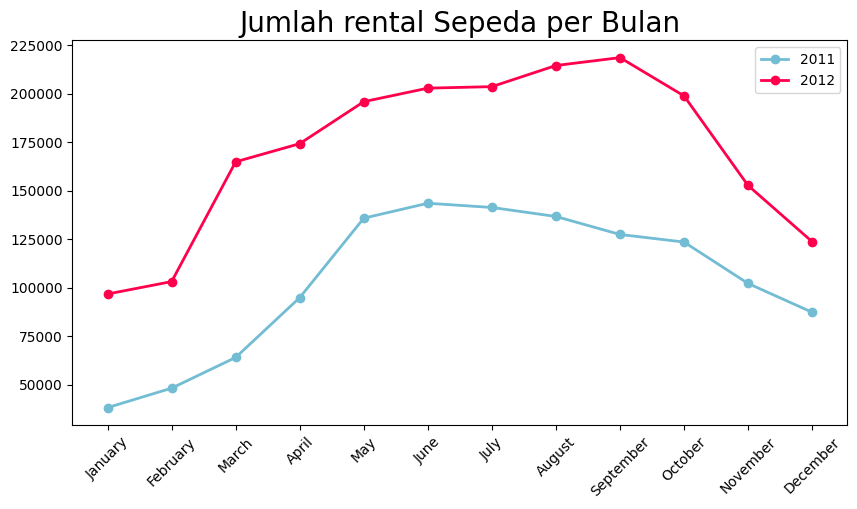

In [113]:


# Memilih data tahun 2011 dan 2012 saja
day_df_2011 = day_df[day_df['dteday'].dt.year == 2011]
day_df_2012 = day_df[day_df['dteday'].dt.year == 2012]

# Menghitung jumlah penggunaan sepeda per bulan untuk tahun 2011 dan 2012
monthly_orders_df_2011 = day_df_2011.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
monthly_orders_df_2012 = day_df_2012.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})

# Mengubah format index menjadi string '%B' (nama bulan)
monthly_orders_df_2011.index = monthly_orders_df_2011.index.strftime('%B')

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df_2011.index, monthly_orders_df_2011["cnt"], marker='o', linewidth=2, color="#72BCD4", label="2011")
plt.plot(monthly_orders_df_2011.index, monthly_orders_df_2012["cnt"], marker='o', linewidth=2, color="#FF004D", label="2012")
plt.title("Jumlah rental Sepeda per Bulan", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.legend()  # Menampilkan legenda
plt.show()


Gambar diatas menunjukan perkembangan jumlah rental dari january hingga desember dengan 2 line yang mempresentasikan tahun 2011 dan 2012. Dapat diamati bahwanya selisih jumlah rental pada tahun 2012 dengan 2011 cukup jauh. Jika dilihat 2011 dan 2012 menunjukan tren yang berbeda, dimana pada tahun 2011 titik tertinggi ada pada bulan june sedangkan tahun 2012 ada di bulan september

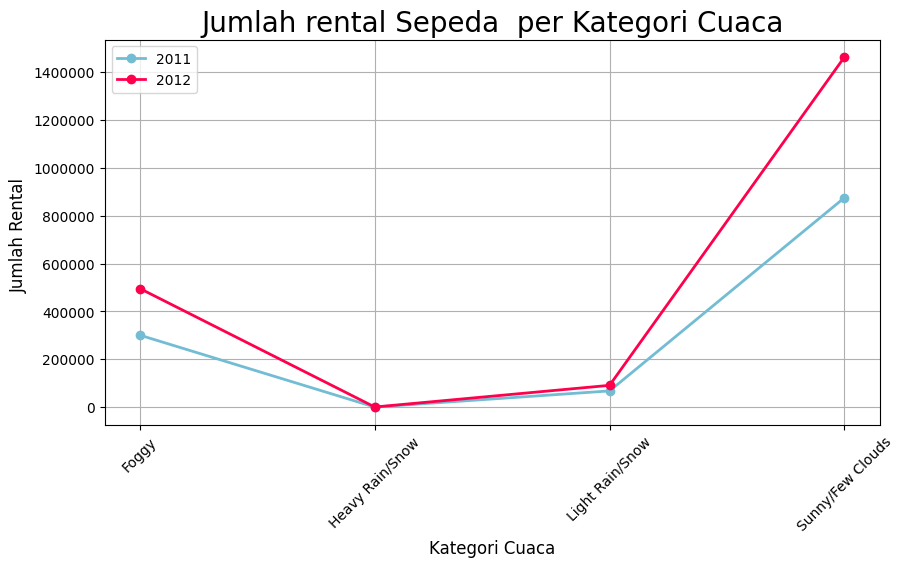

In [123]:
hour_df_2011 = hour_df[hour_df['dteday'].dt.year == 2011]
hour_df_2012 = hour_df[hour_df['dteday'].dt.year == 2012]

# Menghitung jumlah penggunaan sepeda per kategori cuaca untuk tahun 2011 dan 2012
monthly_orders_weather_df_2011 = hour_df_2011.groupby(['weather'])['cnt'].sum()
monthly_orders_weather_df_2012 = hour_df_2012.groupby(['weather'])['cnt'].sum()

# Menggabungkan data ke dalam satu dataframe
monthly_orders_weather_df = pd.concat([monthly_orders_weather_df_2011, monthly_orders_weather_df_2012], axis=1)
monthly_orders_weather_df.columns = ['2011', '2012']  # Mengubah nama kolom

# Plotting
plt.figure(figsize=(10, 5))

# Plotting garis untuk tahun 2011
plt.plot(monthly_orders_weather_df.index, monthly_orders_weather_df['2011'], marker='o', linewidth=2, color="#72BCD4", label="2011")

# Plotting garis untuk tahun 2012
plt.plot(monthly_orders_weather_df.index, monthly_orders_weather_df['2012'], marker='o', linewidth=2, color="#FF004D", label="2012")

plt.title("Jumlah rental Sepeda  per Kategori Cuaca", loc="center", fontsize=20)
plt.xlabel("Kategori Cuaca", fontsize=12)
plt.ylabel("Jumlah Rental ", fontsize=12)
plt.xticks(monthly_orders_weather_df.index, fontsize=10, rotation=45)  # Menampilkan kategori cuaca pada sumbu x
plt.yticks(fontsize=10)
plt.legend()  # Menampilkan legenda
plt.grid(True)  # Menampilkan grid
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

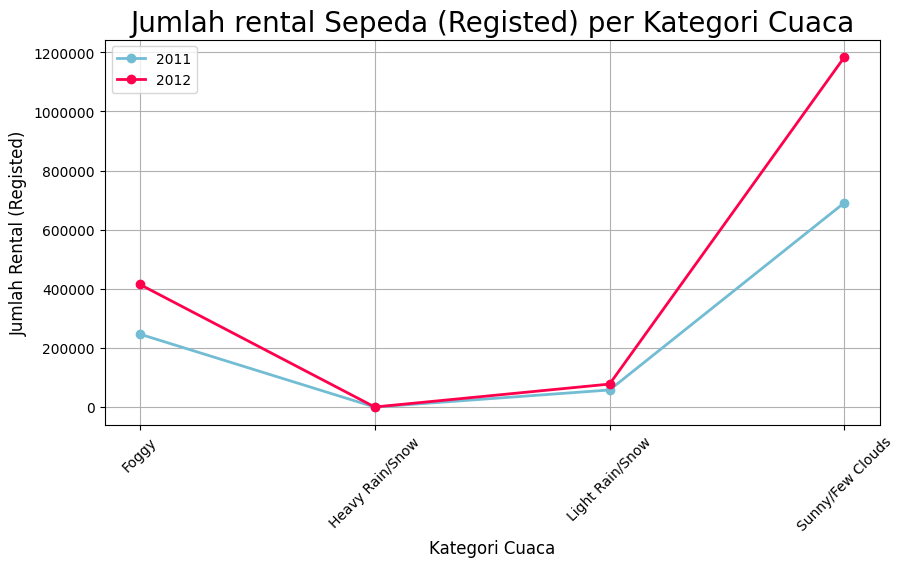

In [114]:
hour_df_2011 = hour_df[hour_df['dteday'].dt.year == 2011]
hour_df_2012 = hour_df[hour_df['dteday'].dt.year == 2012]

# Menghitung jumlah penggunaan sepeda per kategori cuaca untuk tahun 2011 dan 2012
monthly_orders_weather_df_2011 = hour_df_2011.groupby(['weather'])['registered'].sum()
monthly_orders_weather_df_2012 = hour_df_2012.groupby(['weather'])['registered'].sum()

# Menggabungkan data ke dalam satu dataframe
monthly_orders_weather_df = pd.concat([monthly_orders_weather_df_2011, monthly_orders_weather_df_2012], axis=1)
monthly_orders_weather_df.columns = ['2011', '2012']  # Mengubah nama kolom

# Plotting
plt.figure(figsize=(10, 5))

# Plotting garis untuk tahun 2011
plt.plot(monthly_orders_weather_df.index, monthly_orders_weather_df['2011'], marker='o', linewidth=2, color="#72BCD4", label="2011")

# Plotting garis untuk tahun 2012
plt.plot(monthly_orders_weather_df.index, monthly_orders_weather_df['2012'], marker='o', linewidth=2, color="#FF004D", label="2012")

plt.title("Jumlah rental Sepeda (Registed) per Kategori Cuaca", loc="center", fontsize=20)
plt.xlabel("Kategori Cuaca", fontsize=12)
plt.ylabel("Jumlah Rental (Registed)", fontsize=12)
plt.xticks(monthly_orders_weather_df.index, fontsize=10, rotation=45)  # Menampilkan kategori cuaca pada sumbu x
plt.yticks(fontsize=10)
plt.legend()  # Menampilkan legenda
plt.grid(True)  # Menampilkan grid
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

Berdasarkan gambar diatas terlihat jumlah rental (registed) berpengaruh dengan cuaca, yang dimana kategeori sunny/Few Clouds merupakan kategori dengan jumlah rental tertinggi baik pada tahun 2011 dan 2012. Dapat diamati juga jumlah rental pada kategori heavy rain/snow dan Light Rain/snow pada tahun 2012 tidak banya berubah dari tahun 2011, kemungkinan pada tahun 2013 hal tersebut juga terjadi maka sebaiknya perusahaan tidak gegabah  pada 2 kategori musim tersebut

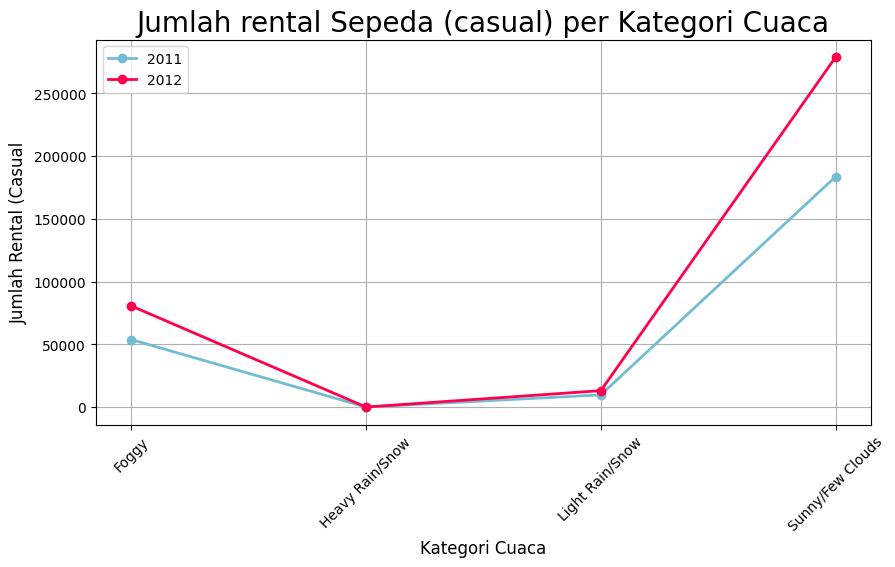

In [115]:
# Memilih data tahun 2011 dan 2012 saja
hour_df_2011 = hour_df[hour_df['dteday'].dt.year == 2011]
hour_df_2012 = hour_df[hour_df['dteday'].dt.year == 2012]

# Menghitung jumlah penggunaan sepeda per kategori cuaca untuk tahun 2011 dan 2012
monthly_orders_weather_df_2011 = hour_df_2011.groupby(['weather'])['casual'].sum()
monthly_orders_weather_df_2012 = hour_df_2012.groupby(['weather'])['casual'].sum()

# Menggabungkan data ke dalam satu dataframe
monthly_orders_weather_df = pd.concat([monthly_orders_weather_df_2011, monthly_orders_weather_df_2012], axis=1)
monthly_orders_weather_df.columns = ['2011', '2012']  # Mengubah nama kolom

# Plotting
plt.figure(figsize=(10, 5))

# Plotting garis untuk tahun 2011
plt.plot(monthly_orders_weather_df.index, monthly_orders_weather_df['2011'], marker='o', linewidth=2, color="#72BCD4", label="2011")

# Plotting garis untuk tahun 2012
plt.plot(monthly_orders_weather_df.index, monthly_orders_weather_df['2012'], marker='o', linewidth=2, color="#FF004D", label="2012")

plt.title("Jumlah rental Sepeda (casual) per Kategori Cuaca", loc="center", fontsize=20)
plt.xlabel("Kategori Cuaca", fontsize=12)
plt.ylabel("Jumlah Rental (Casual", fontsize=12)
plt.xticks(monthly_orders_weather_df.index, fontsize=10, rotation=45)  # Menampilkan kategori cuaca pada sumbu x
plt.yticks(fontsize=10)

# Menghilangkan notasi ilmiah pada sumbu y
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.legend()  # Menampilkan legenda
plt.grid(True)  # Menampilkan grid
plt.show()

Berdasarkan gambar diatas terlihat jumlah rental (casual) berpengaruh dengan cuaca, yang dimana kategeori sunny/Few Clouds merupakan kategori dengan jumlah rental tertinggi baik pada tahun 2011 dan 2012. Dapat diamati juga jumlah rental pada kategori heavy rain/snow dan Light Rain/snow pada tahun 2012 tidak banya berubah dari tahun 2011, kemungkinan pada tahun 2013 hal tersebut juga terjadi maka sebaiknya perusahaan tidak gegabah pada 2 kategori musim tersebut

### Pertanyaan 2:

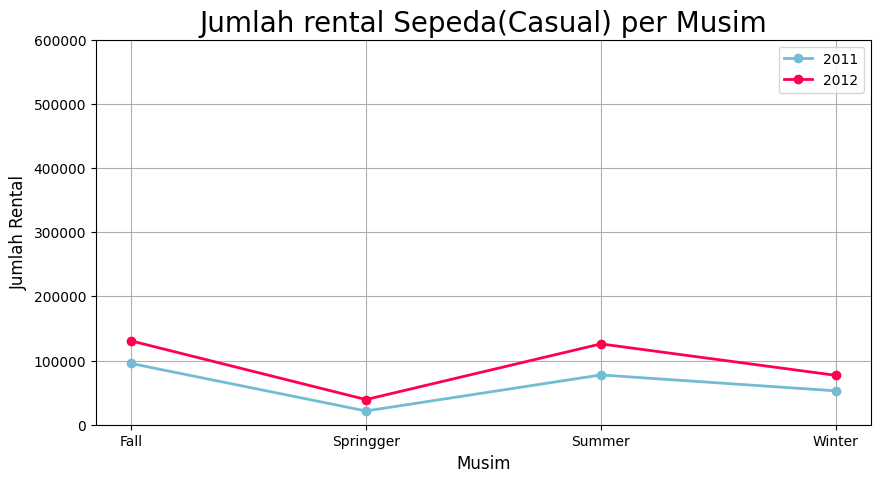

In [116]:
season_orders_df_2011 = day_df_2011.groupby('seasonName')['casual'].sum()
season_orders_df_2012 = day_df_2012.groupby('seasonName')['casual'].sum()

# Menggabungkan data ke dalam satu dataframe
season_orders_df = pd.concat([season_orders_df_2011, season_orders_df_2012], axis=1)
season_orders_df.columns = ['2011', '2012']  # Mengubah nama kolom

max_value = 600000

# Plotting
plt.figure(figsize=(10, 5))

# Plotting garis untuk tahun 2011
plt.plot(season_orders_df.index, season_orders_df['2011'], marker='o', linewidth=2, color="#72BCD4", label="2011")

# Plotting garis untuk tahun 2012
plt.plot(season_orders_df.index, season_orders_df['2012'], marker='o', linewidth=2, color="#FF004D", label="2012")

plt.title("Jumlah rental Sepeda(Casual) per Musim", loc="center", fontsize=20)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Jumlah Rental", fontsize=12)
plt.xticks(fontsize=10)  # Menampilkan musim pada sumbu x
plt.yticks(fontsize=10)

# Menetapkan rentang sumbu y
plt.ylim(0, max_value)

# Menghilangkan notasi ilmiah pada sumbu y
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.legend()  # Menampilkan legenda
plt.grid(True)  # Menampilkan grid
plt.show()

Berdasarkan gambar diatas terlihat bahwa musim cukup mempengaruhi jumlah rental(casual). Namun selisih nilai rental(casual) tahun 2012 dengan 2011 termasuk kecil. Musim summer menjadi Fall dengan nilai rental(casual) tertinggi dibanding musim-musim yang lain.

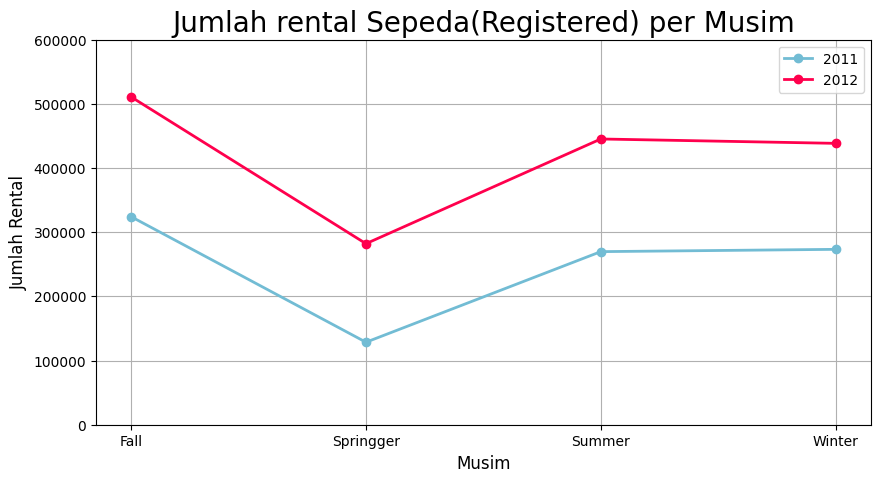

In [117]:
season_orders_df_2011 = day_df_2011.groupby('seasonName')['registered'].sum()
season_orders_df_2012 = day_df_2012.groupby('seasonName')['registered'].sum()

# Menggabungkan data ke dalam satu dataframe
season_orders_df = pd.concat([season_orders_df_2011, season_orders_df_2012], axis=1)
season_orders_df.columns = ['2011', '2012']  # Mengubah nama kolom

max_value = 600000
# Plotting
plt.figure(figsize=(10, 5))

# Plotting garis untuk tahun 2011
plt.plot(season_orders_df.index, season_orders_df['2011'], marker='o', linewidth=2, color="#72BCD4", label="2011")

# Plotting garis untuk tahun 2012
plt.plot(season_orders_df.index, season_orders_df['2012'], marker='o', linewidth=2, color="#FF004D", label="2012")

plt.title("Jumlah rental Sepeda(Registered) per Musim", loc="center", fontsize=20)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Jumlah Rental", fontsize=12)
plt.xticks(fontsize=10)  # Menampilkan musim pada sumbu x
plt.yticks(fontsize=10)

# Menetapkan rentang sumbu y
plt.ylim(0, max_value)

# Menghilangkan notasi ilmiah pada sumbu y
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.legend()  # Menampilkan legenda
plt.grid(True)  # Menampilkan grid
plt.show()

Berdasarkan gambar diatas terlihat bahwa musim cukup mempengaruhi jumlah rental(Registered). Namun selisih nilai rental(Registered) tahun 2012 dengan 2011 termasuk cukup besar dibanding nilai rental(casual). Musim Fall menjadi musim dengan nilai rental(Registered) tertinggi dibanding musim-musim yang lain. Terdapat perbedaan dari line chart rental(casual) yaitu pada musim summer dan winter tidak memiliki selisih terlalu jauh pada tahun 2011 dan 2012.

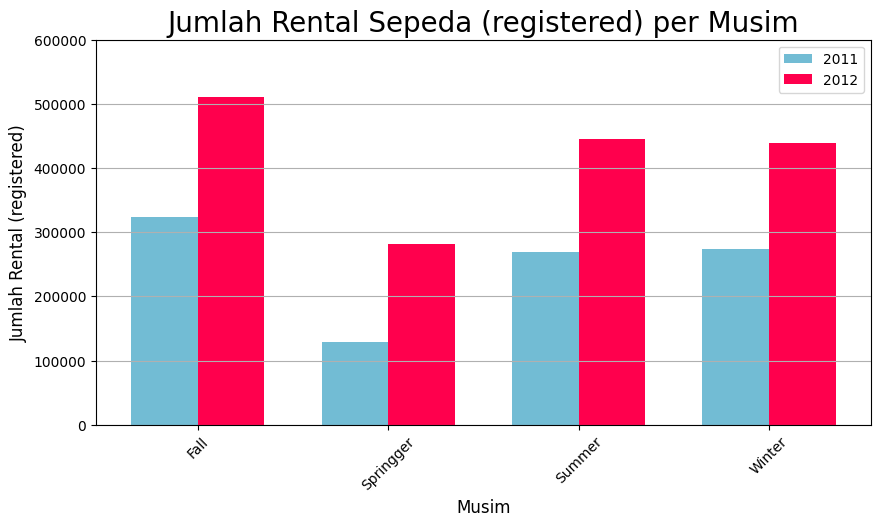

In [118]:
# Separate data by year (if not already done)
day_df_2011 = day_df[day_df['dteday'].dt.year == 2011]
day_df_2012 = day_df[day_df['dteday'].dt.year == 2012]

# Calculate casual rentals per season for each year
season_orders_df_2011 = day_df_2011.groupby('seasonName')['registered'].sum()
season_orders_df_2012 = day_df_2012.groupby('seasonName')['registered'].sum()

max_value=600000

# Combine data into a single DataFrame
season_orders_df = pd.concat([season_orders_df_2011, season_orders_df_2012], axis=1)
season_orders_df.columns = ['2011', '2012']  # Rename columns for clarity

# Create a clustered bar chart
plt.figure(figsize=(10, 5))
index = range(len(season_orders_df.index))  # Index for seasons

# Define bar width for clarity (adjust as needed)
bar_width = 0.35

# Plot bars for 2011
plt.bar(index, season_orders_df['2011'], bar_width, label='2011', color="#72BCD4")

# Plot bars for 2012 with a slight offset to create cluster effect
plt.bar([i + bar_width for i in index], season_orders_df['2012'], bar_width, label='2012', color="#FF004D")

plt.title("Jumlah Rental Sepeda (registered) per Musim", loc="center", fontsize=20)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Jumlah Rental (registered)", fontsize=12)
plt.xticks([i + bar_width / 2 for i in index], season_orders_df.index, rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.ylim(0, max_value)

# Remove scientific notation on y-axis
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.legend()
plt.grid(axis='y')  # Grid lines only on the y-axis for clarity
plt.show()

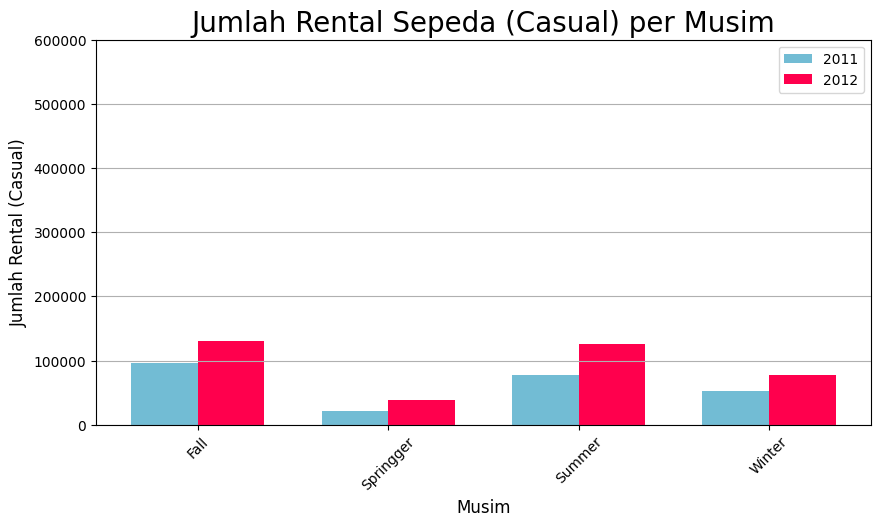

In [119]:
# Separate data by year (if not already done)
day_df_2011 = day_df[day_df['dteday'].dt.year == 2011]
day_df_2012 = day_df[day_df['dteday'].dt.year == 2012]

# Calculate casual rentals per season for each year
season_orders_df_2011 = day_df_2011.groupby('seasonName')['casual'].sum()
season_orders_df_2012 = day_df_2012.groupby('seasonName')['casual'].sum()

max_value=600000


# Combine data into a single DataFrame
season_orders_df = pd.concat([season_orders_df_2011, season_orders_df_2012], axis=1)
season_orders_df.columns = ['2011', '2012']  # Rename columns for clarity

# Create a clustered bar chart
plt.figure(figsize=(10, 5))
index = range(len(season_orders_df.index))  # Index for seasons

# Define bar width for clarity (adjust as needed)
bar_width = 0.35

# Plot bars for 2011
plt.bar(index, season_orders_df['2011'], bar_width, label='2011', color="#72BCD4")

# Plot bars for 2012 with a slight offset to create cluster effect
plt.bar([i + bar_width for i in index], season_orders_df['2012'], bar_width, label='2012', color="#FF004D")

plt.title("Jumlah Rental Sepeda (Casual) per Musim", loc="center", fontsize=20)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Jumlah Rental (Casual)", fontsize=12)
plt.xticks([i + bar_width / 2 for i in index], season_orders_df.index, rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.ylim(0, max_value)

# Remove scientific notation on y-axis
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.legend()
plt.grid(axis='y')  # Grid lines only on the y-axis for clarity
plt.show()

In [120]:
day_df.to_csv("day_clean.csv", index=False)
hour_df.to_csv("hour_clean.csv", index=False)

## Conclusion

- Conclution pertanyaan 1:Bagaimana pengaruh kondisi cuaca  terhadap permintaan rental sepeda?
    
    Berdasarkan data EDA dan data visual dapat diabil kesimpulan bahwasanya cuaca sangat mempengaruhi permintaan rental sepeda.
     

    1.   Pada cuaca Light Rain/Snow dan Heavy Rain/Snow tidak memiliki perbedaan yang signifikan pada tahun 2011 maupun 2012
    2.   Pada cuaca Sunny/Cloudy selalu mengalami lonjakan permintaan rental baik casual maupun registered pada tahun 2011 maupun 2012
    3.   Peminat rental mengalami kenaikan peminat dari tahun 2011 dan 2012, cuaca Summer/Cloudy juga merupakan cuaca yang mengalami kenaikan paling dominan dibanding cuaca-cuaca lainya

  Dari Kesimpulan diatas perusahaan mampu mempersiapkan dan mengatur sumber daya lebih baik lagi dan pengambilan keputusan juga lebih baik.


  



- Conclution pertanyaan 2:Apakah terdapat perbedaan proporsi pengguna casual dan registered berdasarkan musim?

   Berdasarkan data EDA dan data visual dapat diabil kesimpulan bahwasanya  terdapat perbedaan proporsi pengguna casual dan registered berdasarkan musim.


    1.   Peminat rental(casual) jauh lebih sedikit dibanding rental(registered)
    2.   Peminat rental(registered) selalu lebih tinggi dibangding peminat rental(casual) pada setiap musim
    3.   Peminat rental(registered) pada musim summer dan winter tidak memiliki perbedaan yang signifikan sedangkan peminat rental(casual) pada kedua musim terebut memili perbedaan yang signifikan dimana nilai winter yang lebih rendah dibanding summer
    4.   Pada Musim fall nilai rental(casual) dan rental(registered) memiliki nilai tertinggi sedangkan musim springed memiliki nilai terendah.

  Dari Kesimpulan diatas perusahaan mampu mempersiapkan dan mengatur sumber daya lebih baik lagi dan pengambilan keputusan juga lebih baik. Perushaan dapat mempersiapkan sumber daya untuk musim fall karna pada musim fall peminat rental meningkat




